# **OASIS INFOBYTE INTERNSHIP**
# **TASK 1**
### **Submitted by :- Sayandeep Majumder**
### **IRIS FLOWER CLASSIFICATION**
#### Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

# **IRIS Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
iris_data = pd.read_csv("iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_data.drop('Id', axis=1, inplace= True)

In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- **No null values present.**

In [5]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


- **Statistical analysis of numerical columns.**

<Axes: >

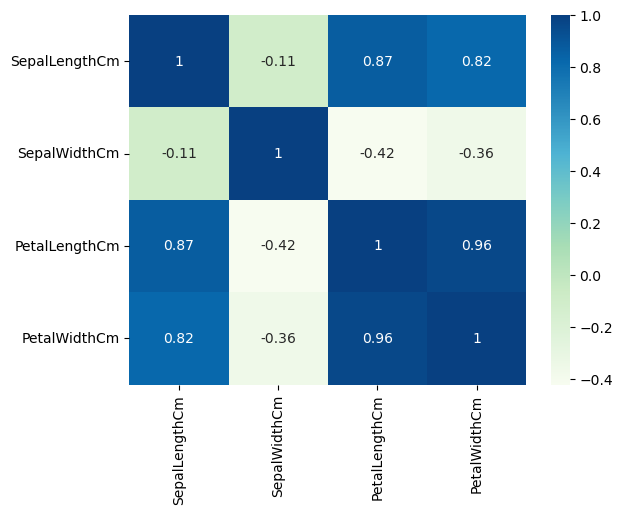

In [6]:
correlation = iris_data.corr( numeric_only= True)
sns.heatmap(correlation, annot= True, cmap = 'GnBu')

#### **Correlation between different columns.** 
- "SepalLengthCm" is highly correlated with "PetalLengthCm" and "PetalWidthCm".
- "PetalLenthCm" is highly correlated with "PetalWidthCm".

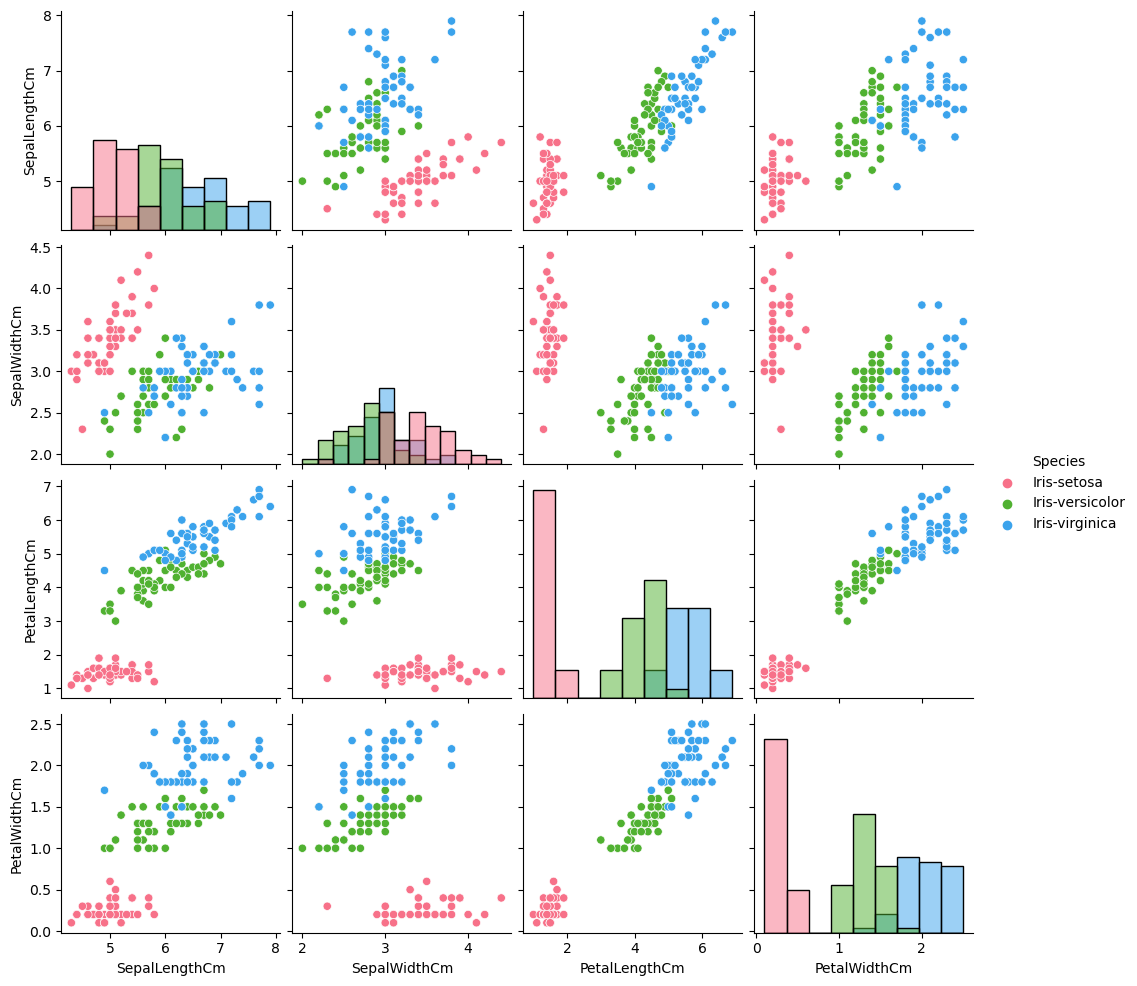

In [7]:
sns.pairplot(iris_data, hue = "Species", palette="husl", diag_kind='hist') 

### **Scatterplot of different columns and histogram of same column with different Species**
- The graph of (SepalLengthCm, PetalLengthCm); (SepalLengthCm, PetalWidthCm) and (PetalLengthCm, PetalWidthCm) are showing roughly linear nature.

In [8]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### **The target variable has three unique values:**
- Iris-setosa 
- Iris-versicolor 
- Iris-virginica 

In [9]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

- **Each kind of Species having equal numbers of data**

<Axes: >

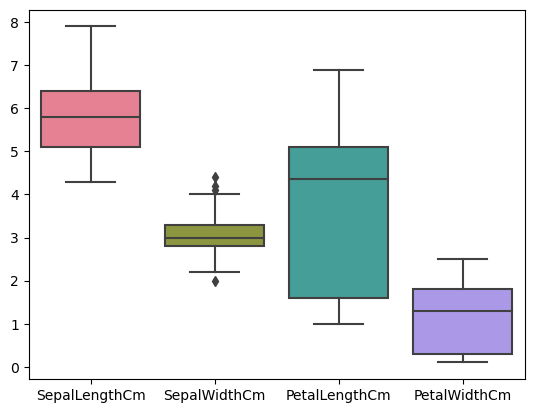

In [10]:
sns.boxplot(iris_data, palette= 'husl')

- **In the column SepalLengthCm, outliers are present. It is visible in the boxplot graph diagram above**

In [11]:
def Detect_Fix_Outliers_IQR(data, col_name):
    q3, q1 = data[col_name].quantile(0.75), data[col_name].quantile(0.25)
    high_threshold, low_threshold = q3 + 1.5*(q3 - q1), q1 - 1.5*(q3 - q1)

    outlier_booleans = np.logical_or(data[col_name].values > high_threshold, data[col_name].values < low_threshold)
    outlier_indexes = np.where(outlier_booleans)[0]

    print(f" Number of Outlier Detected : {len(outlier_indexes)}")

    data[col_name] = np.clip(data[col_name], low_threshold, high_threshold)

    return data

- **Detect and fix the ouliers by using IQR method (Inter Quartile Range).**
- **There are 4 outliers present in the SepalWidth column**
- **Clip the outliers values to the high and low threshold values to improve the data for model testing**

In [12]:
Detect_Fix_Outliers_IQR(data= iris_data, col_name= 'SepalWidthCm')

 Number of Outlier Detected : 4


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

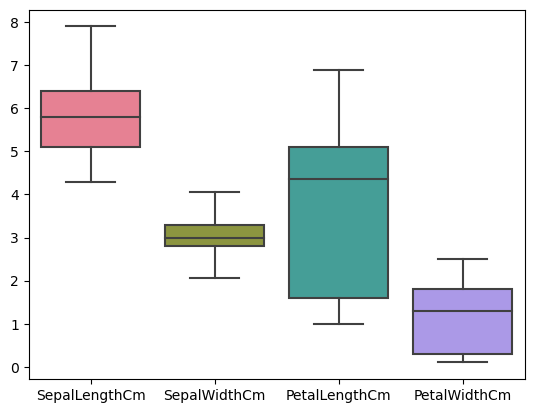

In [13]:
sns.boxplot(iris_data, palette= 'husl')

- **Above diagram of boxplot shows no outliers. Now our data is ready for applying classification model**
- **Separate the Target and Labels columns**

In [14]:
X = iris_data.iloc[:, :-1]
y = iris_data.iloc[:, -1]

- **Split the dataset 80% for training and 20% for testing by using train_test_split from sklearn.model_selection**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## **KNeighborsClassifier model**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [18]:
classifier = KNeighborsClassifier()

In [19]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
y_test_list, y_pred_list = list(y_test), list(y_pred)

In [22]:
for i in range(30):
    print(f"{y_test_list[i]:20} {y_pred_list[i]:20}")

Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa  

- **Only 1 prediction value of Target variable (Species) is different from test data**

In [23]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Accuracy: 96.67%


## **Logistic Regression Model**

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression(max_iter=150)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
y_test_list, y_pred_list = list(y_test), list(y_pred)

In [27]:
for j in range(30):
    print(f"{y_test_list[j]:20} {y_pred_list[j]:20}")

Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa  

In [28]:
accuracy_2 = accuracy_score(y_test, y_pred)*100
print('Accuracy: ' + str(round(accuracy_2, 2)) + '%')

Accuracy: 100.0%


- ### **Logistic Regression gives 100% accuracy**
- ### **Logistic Regression is better than KNeighborsClassifier**